## Supervised Learning - Regression based on Automobile data

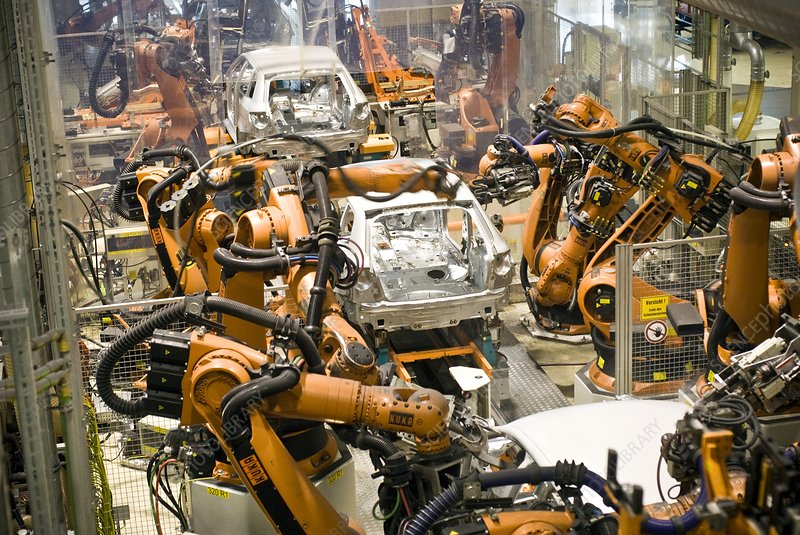

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### Import Dataset

In [2]:
data = pd.read_csv('/Users/user/Desktop/Personal Project/Dataset/Automobile_data.csv')
data.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950


In [3]:
data.shape

(205, 26)

#### Data Cleansing

Check for Duplicates

In [4]:
data.duplicated().any()

False

#### Missing Value

In [5]:
nama_kolom = list(data.columns)

for kolom in nama_kolom:
    data.loc[data[kolom]=='?', kolom] = np.nan

In [6]:
def missing_data(data):    
    df_miss = pd.DataFrame(data.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/data.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(data[kolom].dtype)
        contoh_data.append(data[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [7]:
missing_data(data)

,column,count,percent,DataType,Example
1,normalized-losses,41,20.00,object,106
5,num-of-doors,2,0.98,object,four
18,bore,4,1.95,object,3.33
19,stroke,4,1.95,object,3.47
21,horsepower,2,0.98,object,97
22,peak-rpm,2,0.98,object,5200
25,price,4,1.95,object,9549


In [8]:
kolom_flt = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke']

for kolom in kolom_flt:
    data[kolom] = data[kolom].astype('float64')

In [9]:
median_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']
mean_kolom = ['bore', 'stroke']

for kolom in median_kolom:
    data[kolom] = data[kolom].fillna(data[kolom].median())

for kolom in mean_kolom:
    data[kolom] = data[kolom].fillna(data[kolom].mean())

In [10]:
missing_data(data)

,column,count,percent,DataType,Example
5,num-of-doors,2,0.98,object,four
25,price,4,1.95,object,9549


In [11]:
int_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']

for kolom in int_kolom:
    data[kolom] = data[kolom].astype('int64')

In [12]:
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])

In [13]:
missing_data(data)

,column,count,percent,DataType,Example
25,price,4,1.95,object,9549


In [14]:
data.dropna(inplace=True)

In [15]:
missing_data(data)

,column,count,percent,DataType,Example


In [16]:
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500


In [17]:
data.shape

(201, 26)

Outlier

In [18]:
data['price'] = data['price'].astype('int64')

<AxesSubplot:xlabel='horsepower'>

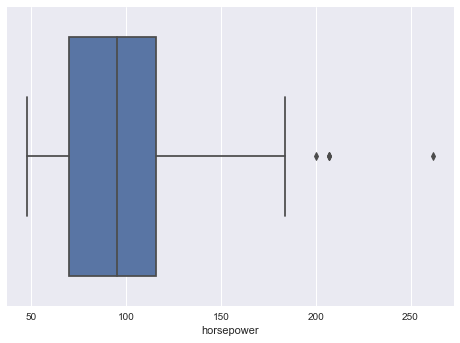

In [19]:
sns.boxplot(data['horsepower'])

### EDA

Apakah horsepower memengaruhi harga mobil?

In [20]:
hp = data[['horsepower']].values #independent
pr = data[['price']].values #dependent

In [21]:
lr = LinearRegression()
lr.fit(hp, pr) #modeling
price_pred = lr.predict(hp) #predict

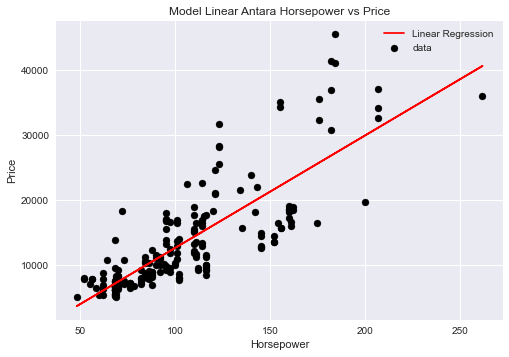

In [22]:
plt.scatter(hp, pr, color='black', label='data')
plt.plot(hp, price_pred, color='red', label='Linear Regression')
plt.title('Model Linear Antara Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()

In [23]:
from sklearn.metrics import r2_score

round(r2_score(data['price'], price_pred), 2)

0.66

Bagaimana hubungan antara tipe bahan bakar dengan harga?

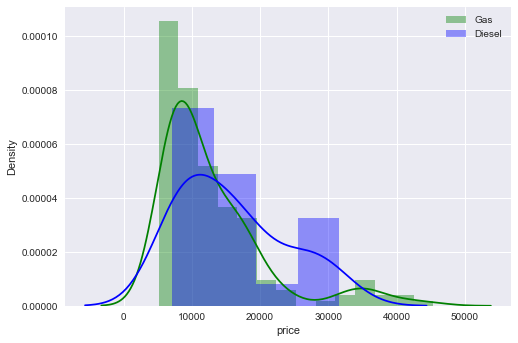

In [24]:
sns.distplot(data.loc[data['fuel-type']=='gas', 'price'], color='green', label='Gas')
sns.distplot(data.loc[data['fuel-type']=='diesel', 'price'], color='blue', label='Diesel')
plt.legend()

### Data Preparation

In [25]:
kolom_object = list(data.select_dtypes('object').columns)

In [26]:
len(kolom_object)

10

In [27]:
data.select_dtypes('object').head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [28]:
one_hot_kolom = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
binary_kolom = ['fuel-type', 'aspiration', 'engine-location']
find = ['num-of-cylinders',  'num-of-doors']

In [29]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [30]:
encode_find = {
    'num-of-cylinders':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
    'num-of-doors': {'two': 2, 'four': 4}
}

In [31]:
data.replace(encode_find, inplace=True)

In [32]:
#label encode
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

for kolom in binary_kolom:
    data[kolom] = lE.fit_transform(data[kolom])

In [33]:
#one hot encode

data = pd.get_dummies(data, columns=one_hot_kolom)

In [34]:
data.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115,1,0,2,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164,1,0,4,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164,1,0,4,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [35]:
#independent
X = data.drop('price', axis=1)

#dependent
y = data[['price']]

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
#base model
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

#modeling
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
pred_dt = model_dt.predict(X_test)
pred_rf = model_rf.predict(X_test)

#### Evaluation

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Decision Tree

In [42]:
print('MAE dari Decision Tree :', mean_absolute_error(y_test, pred_dt))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y_test, pred_dt)))

MAE dari Decision Tree : 2282.317073170732
RMSE dari Decision Tree : 3574.89260626686


Random Forest

In [43]:
print('MAE dari Random Forest :', mean_absolute_error(y_test, pred_rf))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y_test, pred_rf)))

MAE dari Random Forest : 1961.9153455284554
RMSE dari Random Forest : 3090.0270354297327


Testing Hyperparameter Tuning

In [44]:
#base model
model_dt_2 = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=3)
model_rf_2 = RandomForestRegressor(n_estimators=150, min_samples_split=5, min_samples_leaf=3)

#modeling
model_dt_2.fit(X_train, y_train)
model_rf_2.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=5, n_estimators=150)

In [45]:
pred_dt_2 = model_dt_2.predict(X_test)
pred_rf_2 = model_rf_2.predict(X_test)

In [46]:
print('MAE dari Decision Tree :', mean_absolute_error(y_test, pred_dt_2))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y_test, pred_dt_2)))

MAE dari Decision Tree : 2255.801219512195
RMSE dari Decision Tree : 3302.0830507347728


In [47]:
print('MAE dari Random Forest :', mean_absolute_error(y_test, pred_rf_2))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y_test, pred_rf_2)))

MAE dari Random Forest : 1788.409309711065
RMSE dari Random Forest : 2564.111115908652


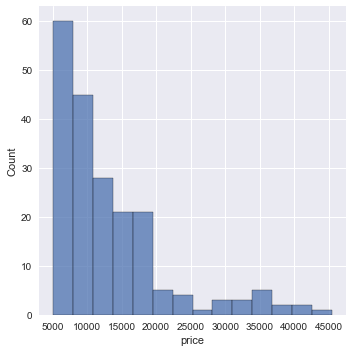

In [48]:
sns.displot(data['price'])